In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Updated_Claimants_Dataset.csv")
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


# EDA

In [ ]:
df.head(5)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASENUM                 1340 non-null   int64  
 1   ATTORNEY                1340 non-null   int64  
 2   CLMSEX                  1328 non-null   float64
 3   CLMINSUR                1299 non-null   float64
 4   SEATBELT                1292 non-null   float64
 5   CLMAGE                  1151 non-null   float64
 6   LOSS                    1340 non-null   float64
 7   Accident_Severity       1340 non-null   object 
 8   Claim_Amount_Requested  1340 non-null   float64
 9   Claim_Approval_Status   1340 non-null   int64  
 10  Settlement_Amount       1340 non-null   float64
 11  Policy_Type             1340 non-null   object 
 12  Driving_Record          1340 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 136.2+ KB


In [ ]:
df.describe() #min,max,std,count

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,6684.598149,10341.430276,0.480597,8787.805463
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,3785.039412,5678.906970,0.499810,4942.577454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,296.410000,562.760000,0.000000,424.520000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,3414.052500,5308.890000,0.000000,4389.100000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,6781.575000,10571.250000,0.000000,8898.245000
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,9708.882500,15291.665000,1.000000,12646.157500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,15794.810000,19988.570000,1.000000,19566.510000


In [ ]:
df["ATTORNEY"].value_counts()

,count
ATTORNEY,
0,685
1,655


<Axes: xlabel='ATTORNEY'>

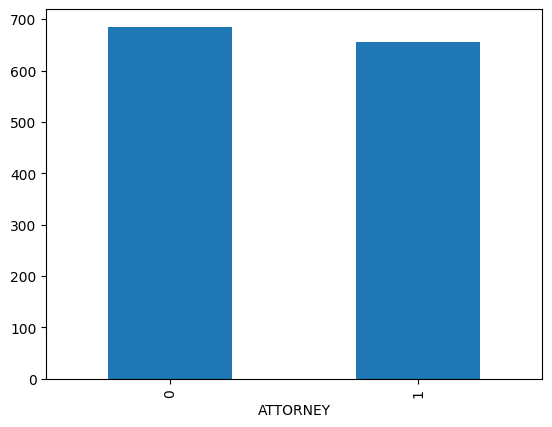

In [ ]:
df["ATTORNEY"].value_counts().plot(kind="bar")

<Axes: xlabel='CLMSEX'>

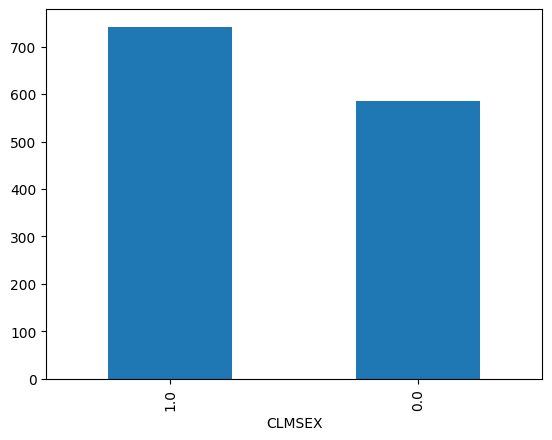

In [ ]:
df["CLMSEX"].value_counts().plot(kind = "bar") #MALE are more than WOMAN

<Axes: ylabel='count'>

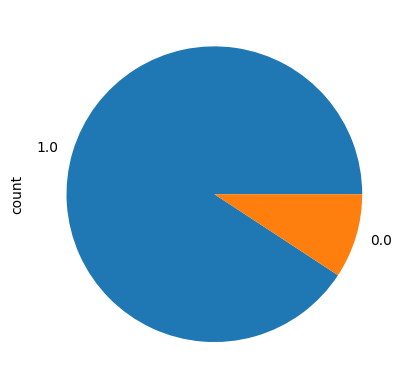

In [ ]:
df["CLMINSUR"].value_counts().plot(kind="pie")

<Axes: xlabel='SEATBELT'>

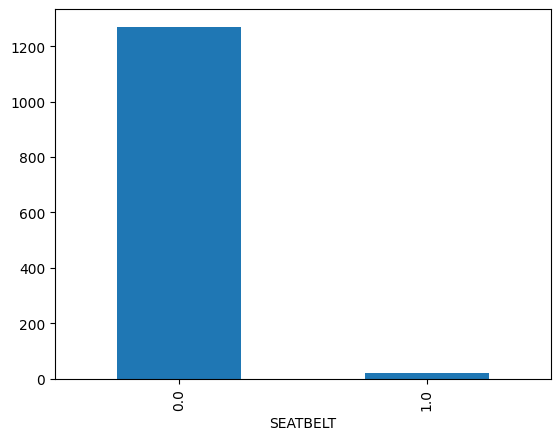

In [ ]:
df["SEATBELT"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

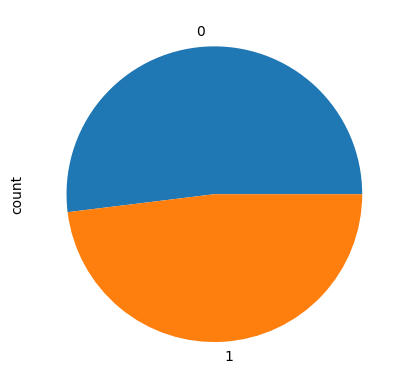

In [ ]:
df["Claim_Approval_Status"].value_counts().plot(kind="pie")

<Axes: xlabel='Accident_Severity'>

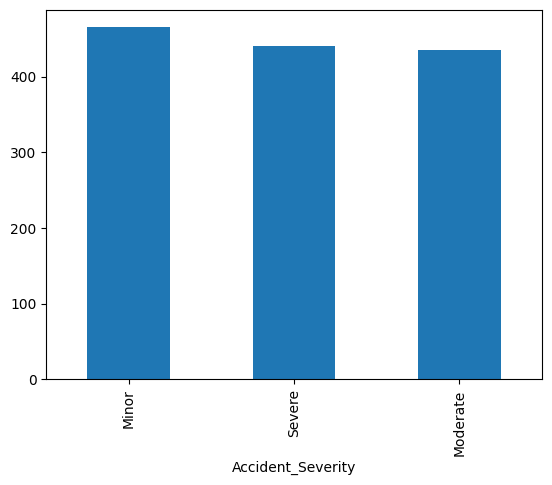

In [ ]:
df["Accident_Severity"].value_counts().plot(kind="bar")

# CHECKING THE DUPLICATES

In [ ]:
df[df.duplicated(keep=False)] #no duplicates found

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


# CHECKING THE NULL VALUES:

In [ ]:
df.isnull().sum() #there are null values in 4 columns

,0
CASENUM,0
ATTORNEY,0
CLMSEX,12
CLMINSUR,41
SEATBELT,48
CLMAGE,189
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


In [ ]:
df.shape

(1340, 13)

# IMPUTING THE NULL VALUES

In [3]:
df["CLMSEX"].fillna(df["CLMSEX"].mode()[0],inplace=True)
df["SEATBELT"].fillna(df["SEATBELT"].mode()[0],inplace=True)
df["CLMINSUR"].fillna(df["CLMINSUR"].mode()[0],inplace=True)
df["CLMAGE"].fillna(df["CLMAGE"].median(),inplace=True) # as AGE is not in a decimal value

In [ ]:
df.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,0
CLMINSUR,0
SEATBELT,0
CLMAGE,0
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


# OUTLIERS

In [ ]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean


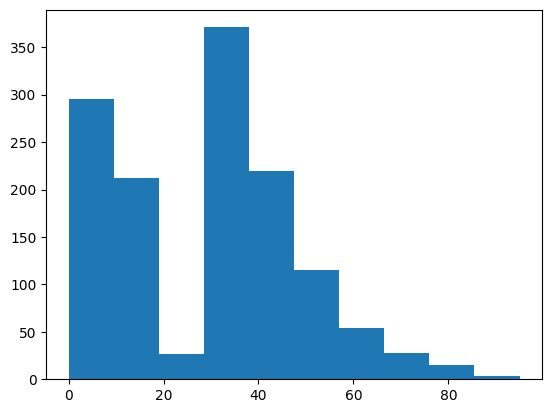

In [ ]:
plt.hist(df["CLMAGE"])#outliers - positive
plt.show()

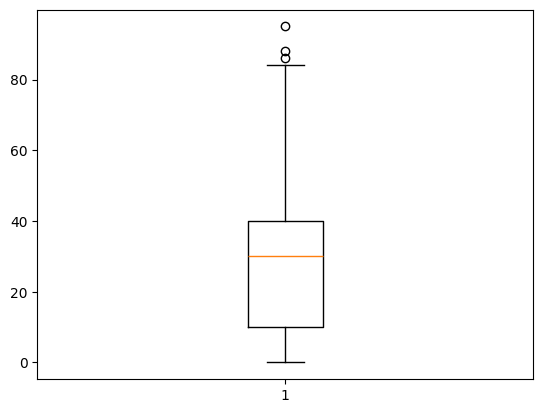

In [ ]:
plt.boxplot(df["CLMAGE"])#outliers - True
plt.show()

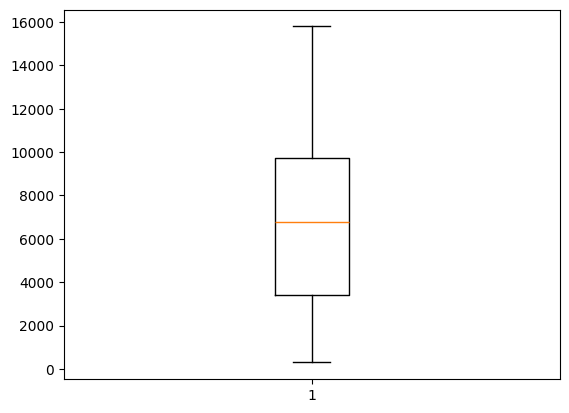

In [ ]:
plt.boxplot(df["LOSS"])
plt.show()

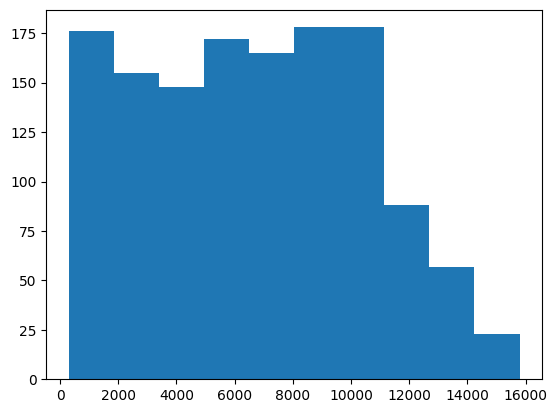

In [ ]:
plt.hist(df["LOSS"])
plt.show()

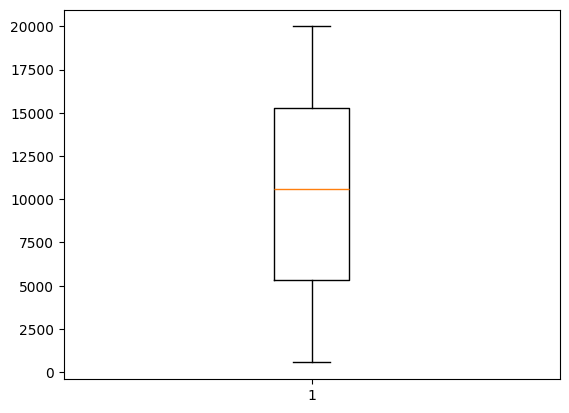

In [ ]:
plt.boxplot(df["Claim_Amount_Requested"])
plt.show()

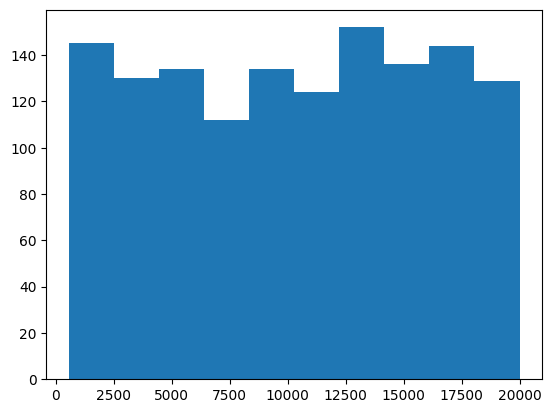

In [ ]:
plt.hist(df["Claim_Amount_Requested"])
plt.show()

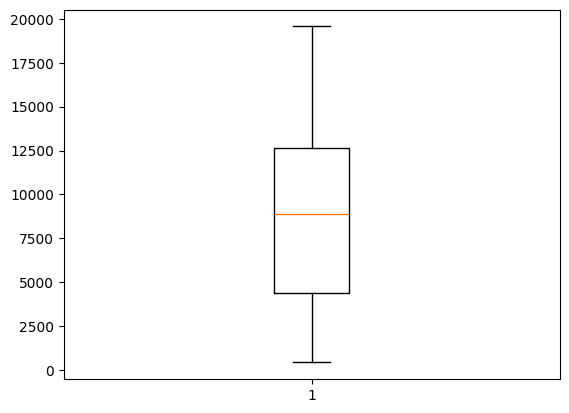

In [ ]:
plt.boxplot(df["Settlement_Amount"])# no outliers
plt.show()

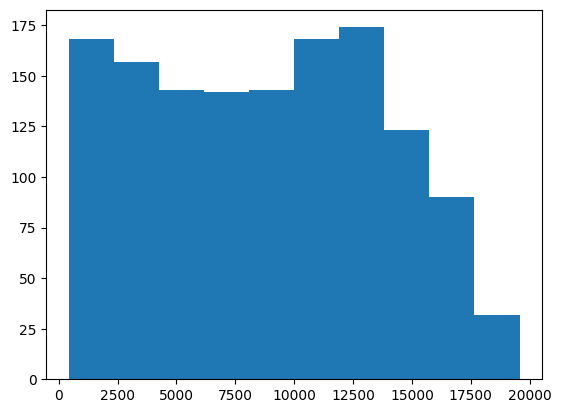

In [ ]:
plt.hist(df["Settlement_Amount"])
plt.show()

#ENCODING

In [4]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the specified columns
df['Accident_Severity'] = le.fit_transform(df['Accident_Severity'])
df['Policy_Type'] = le.fit_transform(df['Policy_Type'])
df['Driving_Record'] = le.fit_transform(df['Driving_Record'])

In [5]:
df.head(10)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,2,4497.19,1,3221.74,1,0
1,3,1,1.0,0.0,0.0,18.0,3746.41,0,6216.38,1,6166.17,0,0
2,66,1,0.0,1.0,0.0,5.0,14282.43,2,17978.55,0,13804.61,0,2
3,70,0,0.0,1.0,1.0,31.0,519.12,2,753.54,1,596.25,0,0
4,96,1,0.0,1.0,0.0,30.0,1354.31,0,2167.42,0,1714.83,0,0
5,97,0,1.0,1.0,0.0,35.0,2504.40,0,4553.78,0,3502.43,1,2
6,10,0,0.0,1.0,0.0,9.0,809.68,2,1017.38,0,712.62,1,0
7,36,0,1.0,1.0,0.0,34.0,3013.37,1,4037.99,1,3710.12,0,0
8,51,1,1.0,1.0,0.0,60.0,6936.94,2,11869.31,0,11751.25,0,1
9,55,1,0.0,1.0,0.0,30.0,4542.14,2,8717.78,1,6689.05,0,2


# CORRELATION USING HEATMAP:

In [ ]:
df.corr()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount
CASENUM,1.000000,0.011717,0.030946,0.042214,-0.009150,-0.002228,0.004575,0.012710,0.009361,0.007279
ATTORNEY,0.011717,1.000000,0.076564,0.076631,-0.055848,0.012223,0.021422,0.011072,0.000624,0.006963
CLMSEX,0.030946,0.076564,1.000000,0.065976,-0.016327,-0.023112,0.001327,-0.000169,-0.034236,0.007101
CLMINSUR,0.042214,0.076631,0.065976,1.000000,0.019953,0.045772,-0.005177,-0.002746,0.019206,0.002062
SEATBELT,-0.009150,-0.055848,-0.016327,0.019953,1.000000,-0.025914,0.000769,-0.008791,-0.018491,-0.015873
CLMAGE,-0.002228,0.012223,-0.023112,0.045772,-0.025914,1.000000,-0.024633,-0.019354,-0.009518,-0.014972
LOSS,0.004575,0.021422,0.001327,-0.005177,0.000769,-0.024633,1.000000,0.961385,0.054232,0.940719
Claim_Amount_Requested,0.012710,0.011072,-0.000169,-0.002746,-0.008791,-0.019354,0.961385,1.000000,0.054362,0.978993
Claim_Approval_Status,0.009361,0.000624,-0.034236,0.019206,-0.018491,-0.009518,0.054232,0.054362,1.000000,0.050316
Settlement_Amount,0.007279,0.006963,0.007101,0.002062,-0.015873,-0.014972,0.940719,0.978993,0.050316,1.000000


<Axes: >

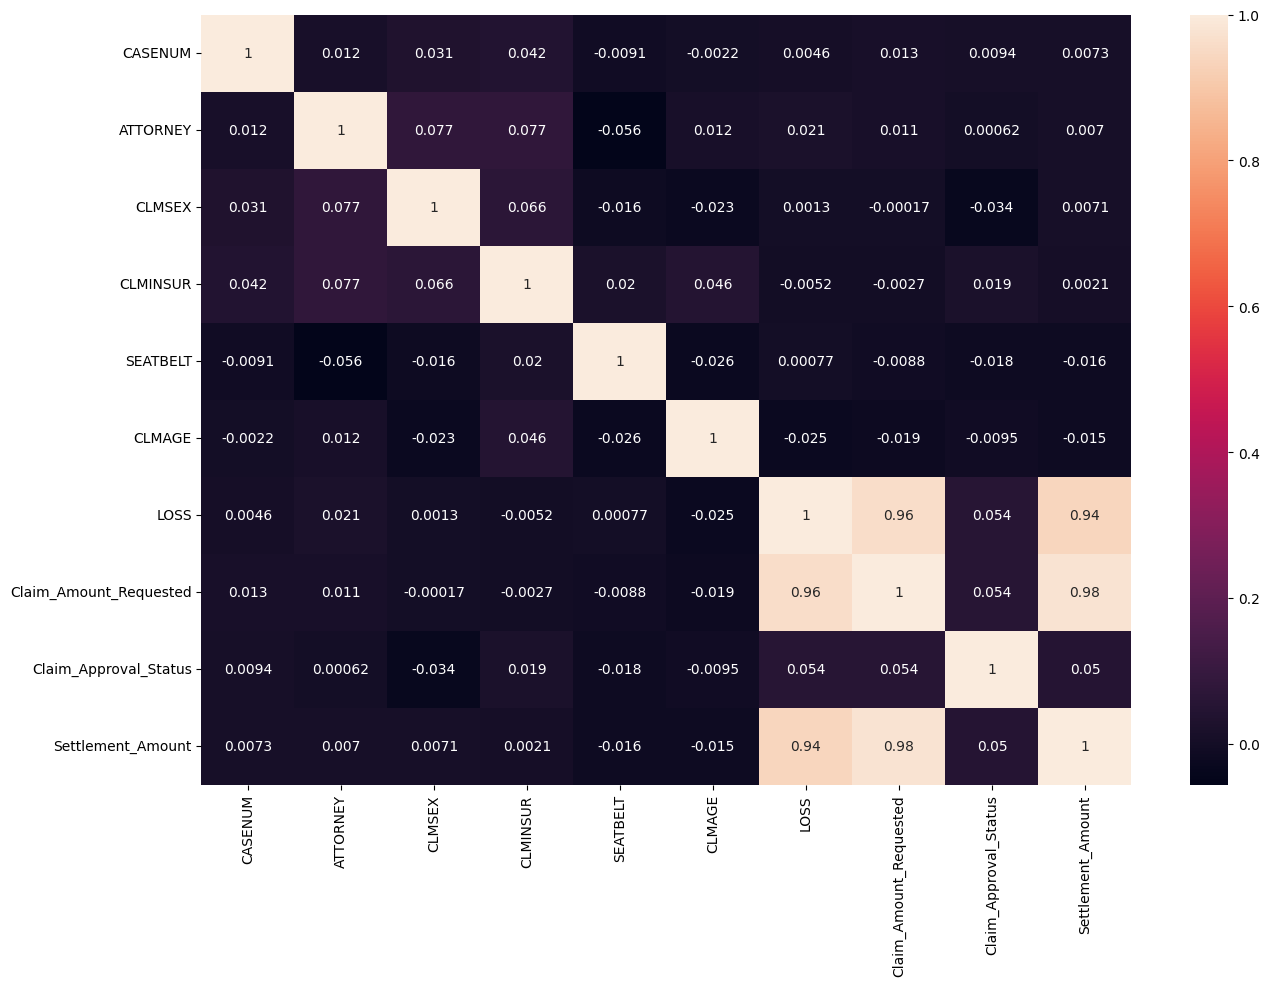

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [6]:
df.drop(["CASENUM"],axis=1,inplace=True) # we dont need CASENUM column
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,0,0.0,1.0,0.0,50.0,2367.86,2,4497.19,1,3221.74,1,0
1,1,1.0,0.0,0.0,18.0,3746.41,0,6216.38,1,6166.17,0,0
2,1,0.0,1.0,0.0,5.0,14282.43,2,17978.55,0,13804.61,0,2
3,0,0.0,1.0,1.0,31.0,519.12,2,753.54,1,596.25,0,0
4,1,0.0,1.0,0.0,30.0,1354.31,0,2167.42,0,1714.83,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,30.0,11749.94,1,14992.27,0,13533.51,0,0
1336,0,1.0,1.0,0.0,46.0,776.62,1,1438.79,0,1178.05,1,1
1337,1,1.0,1.0,0.0,39.0,13261.20,2,18106.45,1,16782.44,1,2
1338,0,1.0,0.0,0.0,8.0,9919.60,0,17119.15,1,14315.98,1,0


# VISUALIZATION THROUGH SCATTERPLOT:

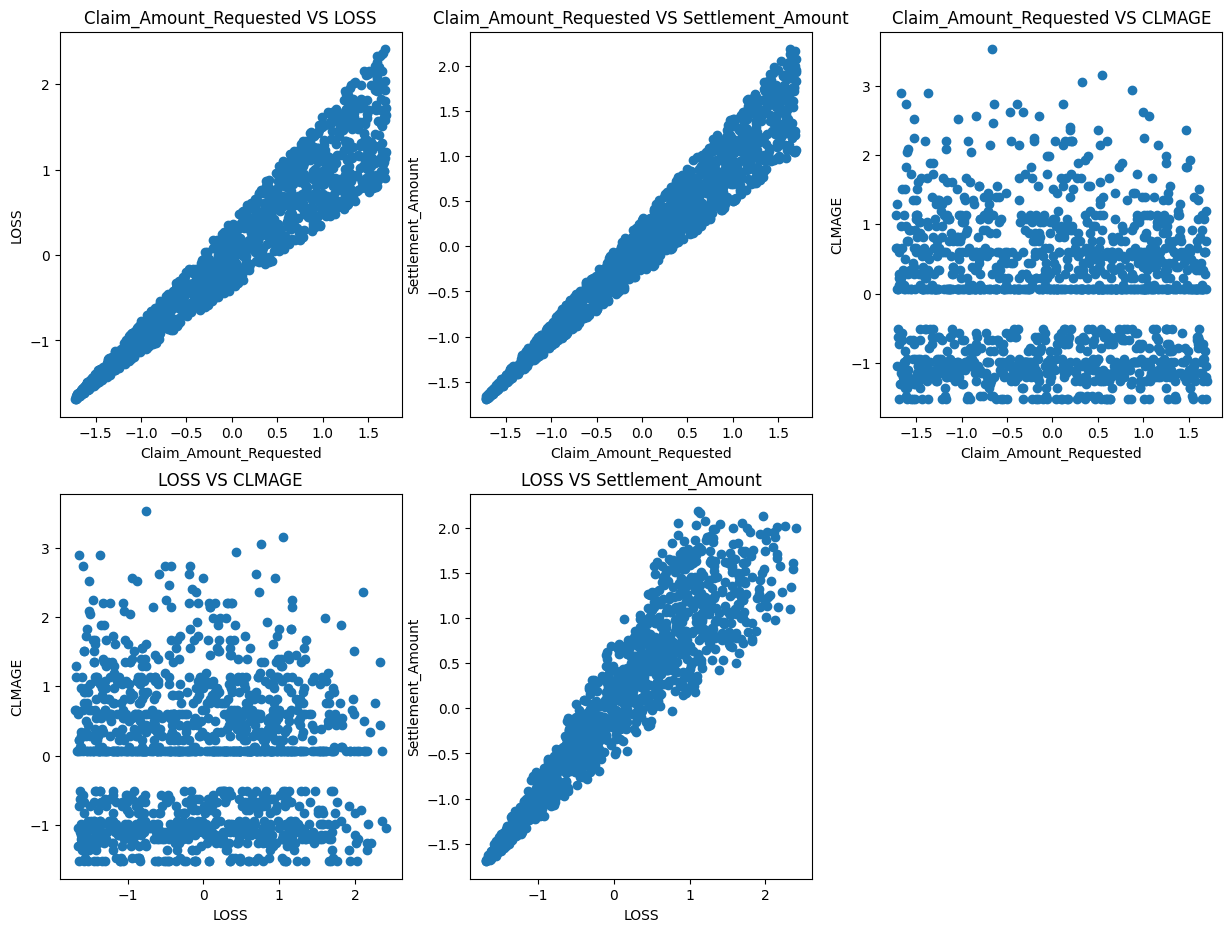

In [ ]:
plt.figure(figsize=(15,11))
plt.subplot(2,3,1)
plt.scatter(df["Claim_Amount_Requested"],df["LOSS"])
plt.title("Claim_Amount_Requested VS LOSS")
plt.xlabel("Claim_Amount_Requested")
plt.ylabel("LOSS")

plt.subplot(2,3,2)
plt.title("Claim_Amount_Requested VS Settlement_Amount")
plt.scatter(df["Claim_Amount_Requested"],df["Settlement_Amount"])
plt.xlabel("Claim_Amount_Requested")
plt.ylabel("Settlement_Amount")

plt.subplot(2,3,3)
plt.title("Claim_Amount_Requested VS CLMAGE")
plt.scatter(df["Claim_Amount_Requested"],df["CLMAGE"])
plt.xlabel("Claim_Amount_Requested")
plt.ylabel("CLMAGE")

plt.subplot(2,3,4)
plt.title("LOSS VS CLMAGE")
plt.scatter(df["LOSS"],df["CLMAGE"])
plt.xlabel("LOSS")
plt.ylabel("CLMAGE")

plt.subplot(2,3,5)
plt.title("LOSS VS Settlement_Amount")
plt.scatter(df["LOSS"],df["Settlement_Amount"])
plt.xlabel("LOSS")
plt.ylabel("Settlement_Amount")

plt.show()   #highly positively associated

# Prepare the Data:

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['ATTORNEY'])
y = df['ATTORNEY']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X.isnull().sum())

CLMSEX                    0
CLMINSUR                  0
SEATBELT                  0
CLMAGE                    0
LOSS                      0
Claim_Amount_Requested    0
Claim_Approval_Status     0
Settlement_Amount         0
Minor                     0
Moderate                  0
Severe                    0
Comprehensive             0
Third-Party               0
Clean                     0
Major Offenses            0
Minor Offenses            0
dtype: int64


In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X =imputer.fit_transform(X)
print(pd.DataFrame(X).isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64


# LOGISTIC REGRESSION:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
#initialize the model
logreg = LogisticRegression(max_iter=1000,random_state =42)
#fit the model
logreg.fit(X_train,y_train)
#predictions
y_pred = logreg.predict(X_test)
print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Logistic Regression Accuracy: 0.582089552238806
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59       128
           1       0.61      0.55      0.58       140

    accuracy                           0.58       268
   macro avg       0.58      0.58      0.58       268
weighted avg       0.58      0.58      0.58       268



Text(0, 0.5, 'True Positive Rate')

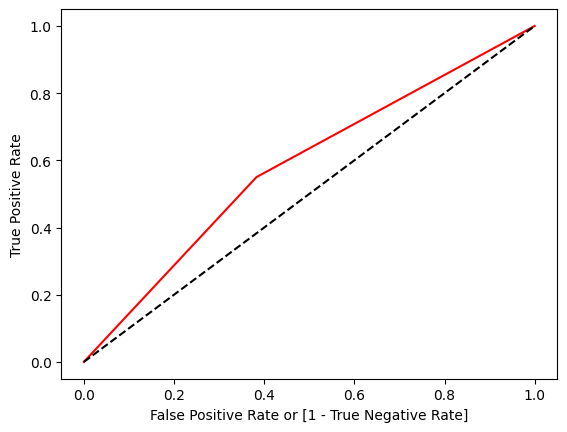

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [11]:
print("ROC AUC:", roc_auc)
# AUC = 0.5:**  The model performs no better than random guessing.
# AUC > 0.5:**  The model has some predictive power.  The higher the AUC, the better the model's performance.
# AUC = 1:**  The model is perfect.

ROC AUC: 0.58359375


An AUC above 0.5 means your model performs better than random chance.  The closer the AUC is to 1.0 the better the model's ability to distinguish between the classes.  A lower AUC indicates it's having more difficulty differentiating them.

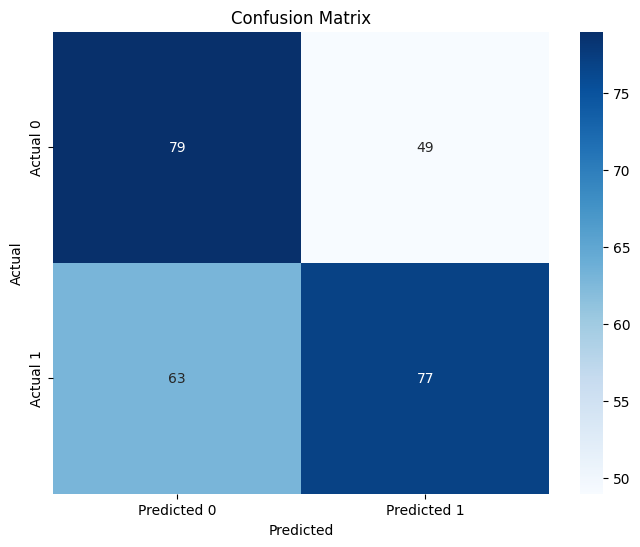

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree Classifier:

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
#initialize model
dtree = DecisionTreeClassifier(random_state=42)
#fit the model
dtree.fit(X_train,y_train)
#predictions
y_pred_dtree = dtree.predict(X_test)
#evaluation
print("Decision Tree Accuracy:",accuracy_score(y_test,y_pred_dtree))
print("Classification Report:\n",classification_report(y_test,y_pred_dtree))

Decision Tree Accuracy: 0.5559701492537313
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.54      0.54       128
           1       0.58      0.57      0.57       140

    accuracy                           0.56       268
   macro avg       0.56      0.56      0.56       268
weighted avg       0.56      0.56      0.56       268



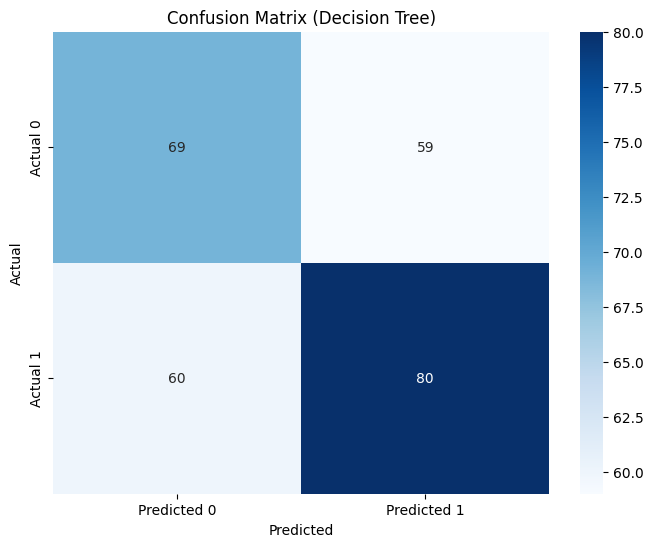

In [14]:
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

# Decision tree model tuning

In [15]:
# Define the hyperparameters and their possible values

from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],          # Criteria for splitting
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],          # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10],            # Minimum number of samples required to be at a leaf node
    'ccp_alpha': [0.0, 0.01, 0.1]              # Pruning parameter
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model to the data (perform the grid search)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             verbose=1)

In [16]:
# Print the best parameters found by GridSearchCV
print("Best parameters found:", grid_search.best_params_)

y_pred_dtree = grid_search.predict(X_test)

# Evaluate the model with the best found parameters
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Best parameters found: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
Test Accuracy: 0.51


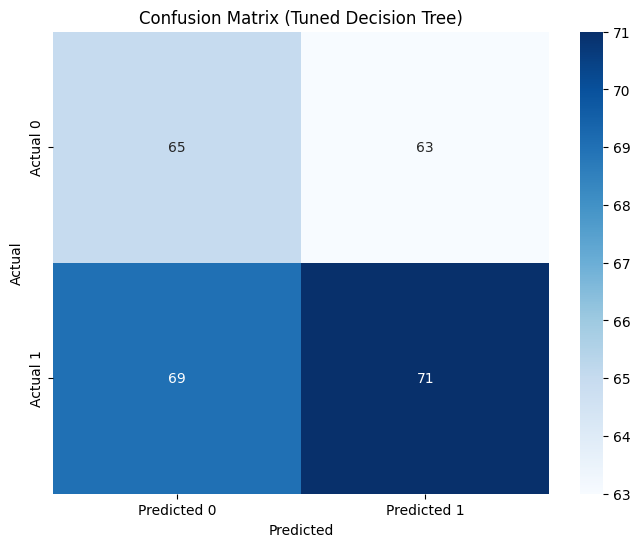

In [17]:
cm_tuned_dtree = confusion_matrix(y_test, y_pred_dtree)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned_dtree, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Decision Tree)')
plt.show()

# Random Forest Classifier:

In [18]:
from sklearn.ensemble import RandomForestClassifier
#initialize
rf = RandomForestClassifier(random_state=42)
#fit the model
rf.fit(X_train,y_train)
#predictions
y_pred_rf = rf.predict(X_test)
#evaluation
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred_rf))
print("Classification Report:\n",classification_report(y_test,y_pred_rf))

Random Forest Accuracy: 0.5335820895522388
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.53      0.52       128
           1       0.56      0.54      0.55       140

    accuracy                           0.53       268
   macro avg       0.53      0.53      0.53       268
weighted avg       0.53      0.53      0.53       268



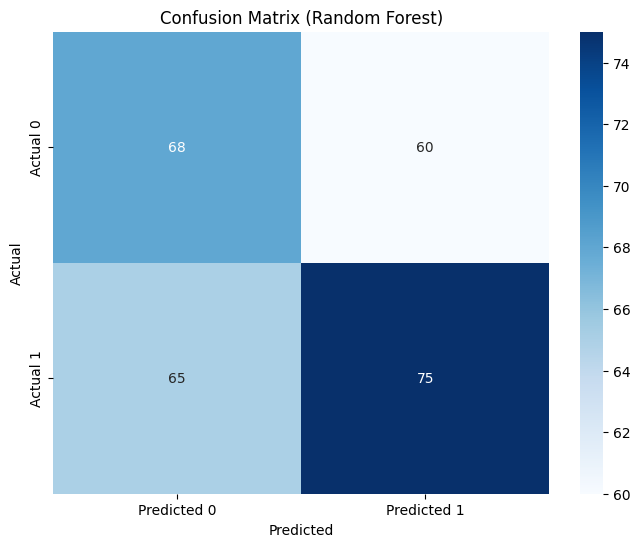

In [19]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Hyperparameter tuning for random forest classifier

In [20]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)

# Fit the model to the data (perform the grid search)
grid_search_rf.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found for Random Forest:", grid_search_rf.best_params_)

# Evaluate the model with the best found parameters
best_rf_model = grid_search_rf.best_estimator_
accuracy_rf = best_rf_model.score(X_test, y_test)
print(f"Test Accuracy for Random Forest: {accuracy_rf:.2f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Test Accuracy for Random Forest: 0.54


# Gradient Boosting Classifier:

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
#initialize
gb = GradientBoostingClassifier(random_state =42)
#fit the model
gb.fit(X_train,y_train)
#predicitons
y_pred_gb = gb.predict(X_test)
#evaluate
print("Gradient Boosting Accuracy:",accuracy_score(y_test,y_pred_gb))
print("Classification Report:\n",classification_report(y_test,y_pred_gb))

Gradient Boosting Accuracy: 0.5298507462686567
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.54      0.52       128
           1       0.55      0.52      0.54       140

    accuracy                           0.53       268
   macro avg       0.53      0.53      0.53       268
weighted avg       0.53      0.53      0.53       268



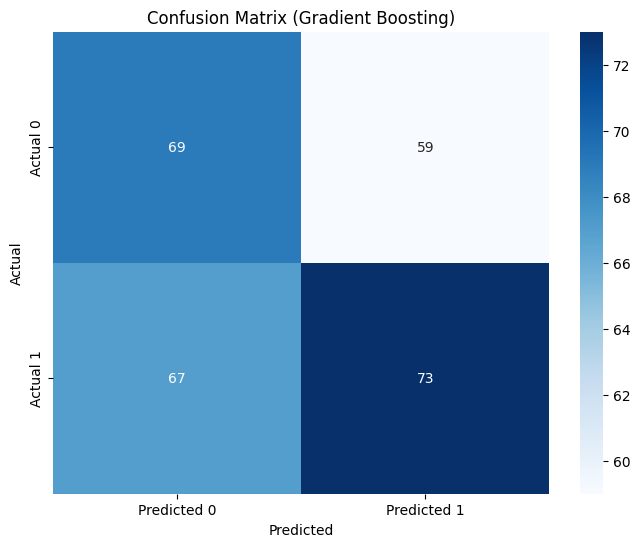

In [22]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

# Gradient boosting model tuning

In [23]:
# Define the parameter grid for GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV for GradientBoostingClassifier
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=1)

# Fit the model to the data (perform the grid search)
grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [24]:
# Print the best parameters found by GridSearchCV
print("Best parameters found for Gradient Boosting:", grid_search_gb.best_params_)

y_pred_gb = grid_search_gb.predict(X_test)

# Evaluate the model with the best found parameters
best_gb_model = grid_search_gb.best_estimator_
accuracy_gb = best_gb_model.score(X_test, y_test)
print(f"Test Accuracy for Gradient Boosting: {accuracy_gb:.2f}")

Best parameters found for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 100}
Test Accuracy for Gradient Boosting: 0.54


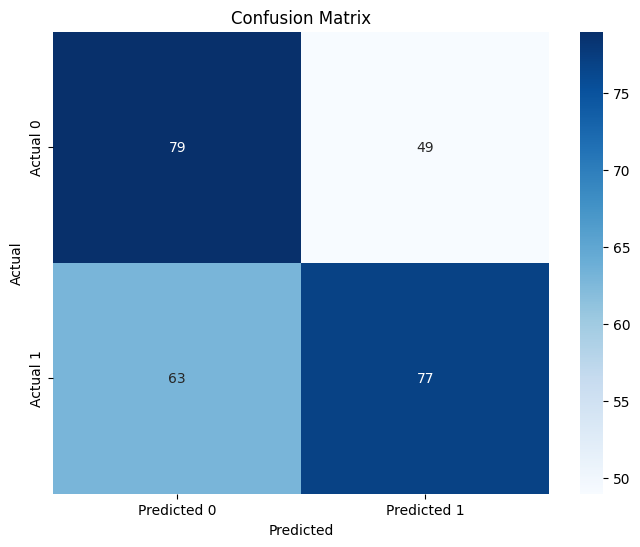

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#XGBOOST

XGBoost Accuracy: 0.5485074626865671
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.52      0.53       128
           1       0.57      0.57      0.57       140

    accuracy                           0.55       268
   macro avg       0.55      0.55      0.55       268
weighted avg       0.55      0.55      0.55       268



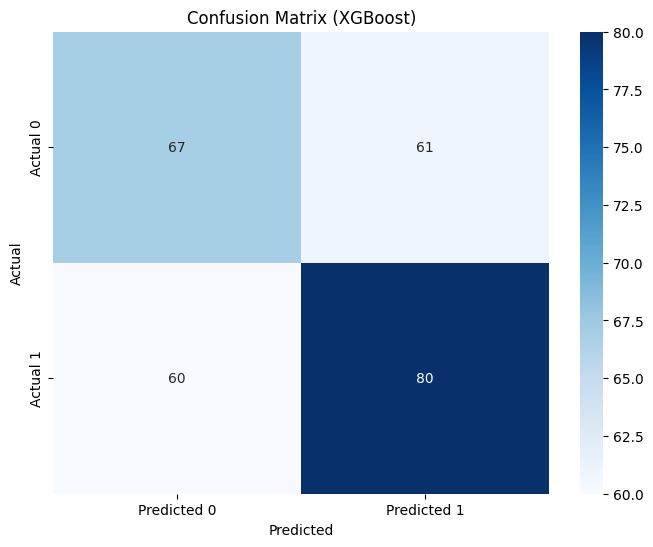

In [26]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

%matplotlib inline
warnings.filterwarnings('ignore')

# ... (Your existing code for data loading, preprocessing, etc.)

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()



In [27]:
# XGBoost Hyperparameter Tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

print("Best parameters found for XGBoost:", grid_search_xgb.best_params_)
best_xgb_model = grid_search_xgb.best_estimator_
accuracy_xgb = best_xgb_model.score(X_test, y_test)
print(f"Test Accuracy for XGBoost: {accuracy_xgb:.2f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Test Accuracy for XGBoost: 0.56


In [28]:
import joblib

# saving 'grid_search_xgb'
joblib.dump(grid_search_xgb, 'grid_search_xgb.joblib')

['grid_search_xgb.joblib']

In [30]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [40]:
%%writefile app.py
# above line is to write in app.py file created by user

import pickle
import joblib
import pandas as pd
import streamlit as st
# Load the saved model
model = joblib.load('grid_search_xgb.joblib')

# Example usage (replace with your actual input data)
# Assuming X_test is your test data
# You would need to preprocess your new data similarly as you did for your training data
# (e.g. imputation, scaling, encoding) before making predictions
# example_input = X_test.iloc[0].values.reshape(1,-1)

# y_pred = loaded_model.predict(example_input)

# print(y_pred)

st.title("ATTORNEY PREDICTION")
import streamlit as st

# Assuming 'grid_search_gb' is the GridSearchCV object you want to save
# joblib.dump(grid_search_gb, 'grid_search_gb.joblib')

# Load the saved model
model = joblib.load('grid_search_xgb.joblib')

st.title("ATTORNEY PREDICTION")

# Input fields for user
clmsex = st.selectbox("male:1, female:0", [1,0])
clminsur = st.selectbox("Claimant_insurance yes:1, no:0", [1, 0])
seatbelt = st.selectbox("Seatbelt_worn yes:1, no:0", [1,0])
clmage = st.number_input("Claimant_Age", min_value=0)
loss = st.number_input("Loss_Amount", min_value=0.0)
accident_severity=st.selectbox("Minor accident:0, Moderate accident:1, Severe accident:2", [2,1,0])
claim_amount_requested = st.number_input("Claim Amount Requested", min_value=0.0)
claim_approval_status = st.selectbox("Claim_Approved:1, Claim_Rejected:0", [1,0])
settlement_amount= st.number_input("Settlement Amount", min_value=0.0)
policy_type= st.selectbox("Third-Party:1, Comprehensive:0", [1,0])
driving_record=st.selectbox("Clean_driving:0, Major offence:1, Minor offence:2", [2,1,0])


# Create a dictionary to store the input values
input_data = {
    'CLMSEX': clmsex,
    'CLMINSUR': clminsur,
    'SEATBELT': seatbelt,
    'CLMAGE':clmage,
    'LOSS': loss,
    'Accident_Severity':accident_severity,
    'Claim_Amount_Requested': claim_amount_requested,
    'Claim_Approval_Status': claim_approval_status,
    'Settlement_Amount': settlement_amount,
    'Policy_Type': policy_type,
    'Driving_Record': driving_record,

}

# Create a DataFrame from the input dictionary
input_df = pd.DataFrame([input_data])

# Preprocess the input data (similar to your training data)
# ... (code for imputation, scaling, and encoding using your original code)

# Example: Assuming you have a function called preprocess_input to handle the preprocessing
# input_df = preprocess_input(input_df)

# Make prediction using the loaded model
if st.button('Predict'):
    try:
      prediction = model.predict(input_df)
      if prediction[0] == 0:
          st.write("Prediction: No Attorney")
      else:
          st.write("Prediction: Attorney")
    except Exception as e:
        st.write(f"An error occurred: {e}")


Overwriting app.py


In [41]:
!wget -q -O - ipv4.icanhazip.com

34.23.189.18


In [42]:


!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
changed 22 packages in 2s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.189.18:8501

⠸⠼⠴⠦your url is: https://shaky-apples-share.loca.lt
